In [1]:
import pandas as pd
import geopandas as gpd

C:\Users\mikko\AppData\Local\Temp\ipykernel_14076\1259499560.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
fp_2019 = "2019_monthly.csv"
fp_2020 ="2020_monthly.csv"
fp_2021 = "2021_monthly.csv"
fp_2022 = "2022_monthly.csv"
fp_2023 = "2023_monthly.csv"

data_2019 = pd.read_csv(fp_2019,sep=",")
data_2020 = pd.read_csv(fp_2020,sep=",")
data_2021 = pd.read_csv(fp_2021,sep=",")
data_2022 = pd.read_csv(fp_2022,sep=",")
data_2023 = pd.read_csv(fp_2023,sep=",")




In [3]:
geo_2020 = gpd.read_file("geom_2020.gpkg")

In [4]:
geo_data = gpd.read_file("geom_alueet.gpkg",crs = 'EPSG:3067')



In [5]:
geo_2020 = geo_2020.to_crs("EPSG:3067") 

In [6]:
geo_2020.crs == geo_data.crs

True

In [7]:
geo_data.rename(columns={'edgeUID': 'edge_uid'}, inplace=True)
geo_2020.rename(columns={'edgeUID': 'edge_uid'}, inplace=True)

In [8]:
all = pd.concat([data_2023, data_2022, data_2021], ignore_index=True)

In [9]:
data20202021 = pd.concat([data_2020, data_2019], ignore_index=True)

In [10]:
data_merged = pd.merge(all, geo_data, on='edge_uid', how='left')
year2020_merged = pd.merge(data20202021, geo_2020, on='edge_uid', how='left')


In [11]:
year2020_merged_parks = year2020_merged.loc[
    (year2020_merged['national_park'] == 'Yllas') | 
    (year2020_merged['national_park'] == 'Pyha') | 
    (year2020_merged['national_park'] == 'UK')
]


In [12]:
data_merged= pd.concat([data_merged,year2020_merged_parks], ignore_index=True)

In [13]:
data_merged['month'] = pd.to_datetime(data_merged['month'])

data_merged['year'] = data_merged['month'].dt.year

data_merged.head()

,edge_uid,activity_type,month,total_trip_count,forward_trip_count,reverse_trip_count,forward_people_count,reverse_people_count,forward_commute_trip_count,reverse_commute_trip_count,...,reverse_65_plus_people_count,forward_average_speed_meters_per_second,reverse_average_speed_meters_per_second,osm_reference_id,ride_count,ebike_ride_count,osmId,national_park,geometry,year
0,225221751,"Ride,EBikeRide",2023-07-01,10,5,5,5,5,0,0,...,0,6.59,5.21,389893342,10,0,NaN,NaN,None,2023
1,225221751,"Ride,EBikeRide",2023-08-01,5,0,5,0,5,0,0,...,0,0.00,3.23,389893342,5,0,NaN,NaN,None,2023
2,225243852,"Ride,EBikeRide",2023-08-01,15,10,10,5,5,0,0,...,0,4.01,3.92,758163275,5,10,NaN,NaN,None,2023
3,225243852,"Ride,EBikeRide",2023-03-01,20,15,0,5,0,0,0,...,0,3.31,0.00,758163275,15,0,NaN,NaN,None,2023
4,225243852,"Ride,EBikeRide",2023-01-01,10,5,5,5,5,0,0,...,0,4.05,6.19,758163275,5,0,NaN,NaN,None,2023


In [14]:
testi23 = data_merged.loc[data_merged['year'] == 2020]

In [15]:
print(testi23['total_trip_count'].sum())
#5885535'

538605


In [29]:
yllas_df = data_merged.loc[data_merged['national_park']=='Yllas']

UK_df = data_merged.loc[data_merged['national_park']=='UK']

pyha_df = data_merged.loc[data_merged['national_park']=='Pyha']

all_df = data_merged.loc[data_merged['national_park'].isin(['Yllas', 'Pyha', 'UK'])]


len(yllas_df)

25386

In [30]:
# Group by the desired column (e.g., 'year') and sum the required fields
yllas_grouped = yllas_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
yllas_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)


# Group by the desired column (e.g., 'year') and sum the required fields
UK_grouped = UK_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
UK_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)


# Group by the desired column (e.g., 'year') and sum the required fields
pyha_grouped = pyha_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
pyha_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)


# Group by the desired column (e.g., 'year') and sum the required fields
all_grouped = all_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
all_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)

In [80]:
grouped_df.head()

,year,ride,eride,18_34,35_54,55_64,65plus,male,female
0,2019,138475,5170,13200,34195,1400,0,47830,8550
1,2020,296825,19760,32810,75665,3685,340,102660,19935
2,2021,375935,48080,38200,93585,5165,1415,119265,28700
3,2022,231670,48985,24150,67940,4785,425,85930,19690
4,2023,237680,66275,29235,70870,8370,1595,94765,22185


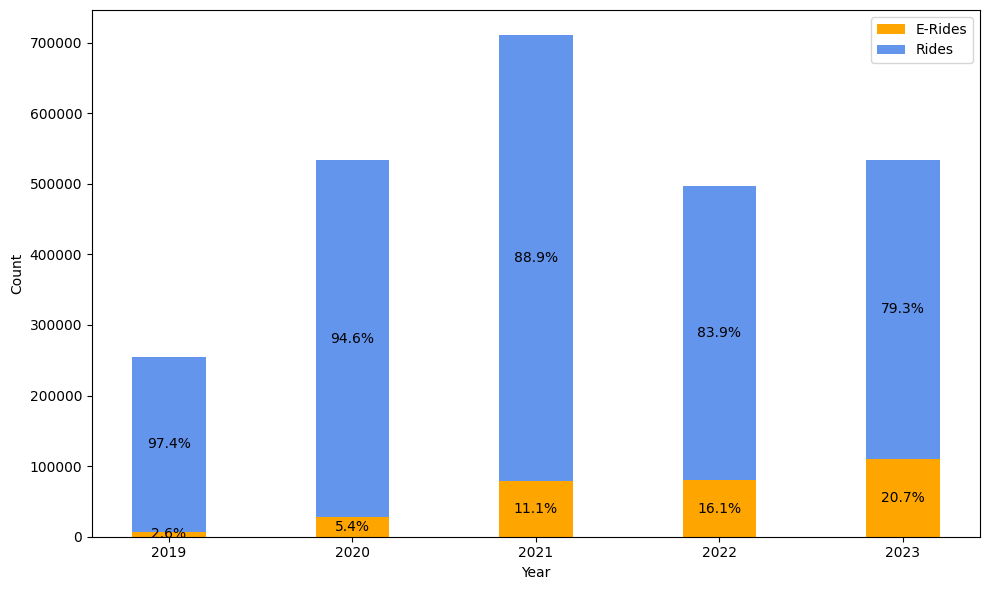

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data from your DataFrame
years = all_grouped['year']
ride = all_grouped['ride']
eride = all_grouped['eride']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the e-ride bars (on the bottom)
bars_eride = ax.bar(x, eride, width=0.4, color='orange', label='E-Rides')

# Plotting the ride bars on top of the e-ride bars
bars_ride = ax.bar(x, ride, width=0.4, bottom=eride, color='cornflowerblue', label='Rides')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Rides vs E-Rides by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='center', color='black', fontsize=10)

# Total counts for percentage calculations
total_counts = np.array(ride) + np.array(eride)

# Add percentage labels for e-rides
add_percentage_labels(bars_eride, np.zeros(len(eride)), total_counts)

# Add percentage labels for rides
add_percentage_labels(bars_ride, eride, total_counts)

# Display the plot
plt.tight_layout()


plt.savefig('ride_eride_kaikki.png',dpi=300)

plt.show()

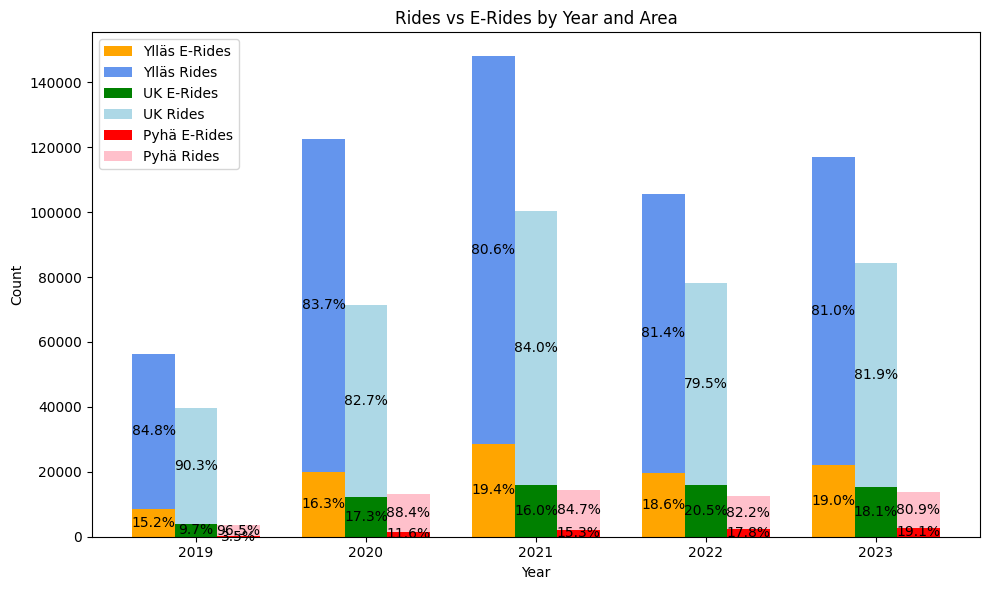

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data from your DataFrame (assuming same years for all)
yllas_years = yllas_grouped['year'] 
yllas_ride = yllas_grouped['male'] 
yllas_eride = yllas_grouped['female'] 

uk_years = UK_grouped['year'] 
uk_ride = UK_grouped['male'] 
uk_eride = UK_grouped['female']  

pyha_years = pyha_grouped['year'] 
pyha_ride = pyha_grouped['male'] 
pyha_eride = pyha_grouped['female'] 

# Define the positions for the bars 
years = yllas_years  # assuming same years for all areas
x = np.arange(len(years))  # the label locations
bar_width = 0.25  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the e-ride and ride bars for Ylläs
bars_yllas_eride = ax.bar(x - bar_width, yllas_eride, width=bar_width, color='orange', label='Ylläs E-Rides')
bars_yllas_ride = ax.bar(x - bar_width, yllas_ride, width=bar_width, bottom=yllas_eride, color='cornflowerblue', label='Ylläs Rides')

# Plotting the e-ride and ride bars for UK
bars_uk_eride = ax.bar(x, uk_eride, width=bar_width, color='green', label='UK E-Rides')
bars_uk_ride = ax.bar(x, uk_ride, width=bar_width, bottom=uk_eride, color='lightblue', label='UK Rides')

# Plotting the e-ride and ride bars for Pyhä
bars_pyha_eride = ax.bar(x + bar_width, pyha_eride, width=bar_width, color='red', label='Pyhä E-Rides')
bars_pyha_ride = ax.bar(x + bar_width, pyha_ride, width=bar_width, bottom=pyha_eride, color='pink', label='Pyhä Rides')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Rides vs E-Rides by Year and Area')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='center', color='black', fontsize=10)

# Total counts for percentage calculations
yllas_total = np.array(yllas_ride) + np.array(yllas_eride)
uk_total = np.array(uk_ride) + np.array(uk_eride)
pyha_total = np.array(pyha_ride) + np.array(pyha_eride)

# Add percentage labels for Ylläs e-rides and rides
add_percentage_labels(bars_yllas_eride, np.zeros(len(yllas_eride)), yllas_total)
add_percentage_labels(bars_yllas_ride, yllas_eride, yllas_total)

# Add percentage labels for UK e-rides and rides
add_percentage_labels(bars_uk_eride, np.zeros(len(uk_eride)), uk_total)
add_percentage_labels(bars_uk_ride, uk_eride, uk_total)

# Add percentage labels for Pyhä e-rides and rides
add_percentage_labels(bars_pyha_eride, np.zeros(len(pyha_eride)), pyha_total)
add_percentage_labels(bars_pyha_ride, pyha_eride, pyha_total)

# Display the plot
plt.tight_layout()
plt.show()


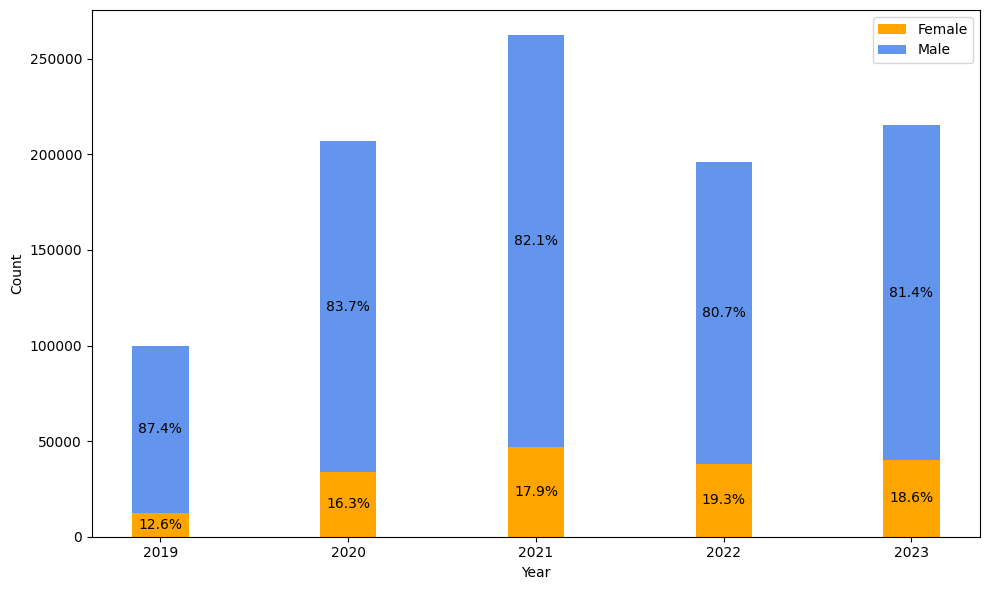

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
years = all_grouped['year']
male = all_grouped['male']
female = all_grouped['female']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Calculate total counts for percentage calculations
total_counts = np.array(male) + np.array(female)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the female bars (on the bottom)
bars_female = ax.bar(x, female, width=0.3, color='orange', label='Female')

# Plotting the male bars on top of the female bars
bars_male = ax.bar(x, male, width=0.3, bottom=female, color='cornflowerblue', label='Male')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Male vs Female Count by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='center', color='black', fontsize=10)

# Add percentage labels for females
add_percentage_labels(bars_female, np.zeros(len(female)), total_counts)

# Add percentage labels for males
add_percentage_labels(bars_male, female, total_counts)

# Display the plot
plt.tight_layout()


plt.savefig('male_female_kaikki.png',dpi=300)

plt.show()


In [96]:
grouped_df.columns

Index(['year', 'ride', 'eride', '18_34', '35_54', '55_64', '65plus', 'male',
       'female'],
      dtype='object')

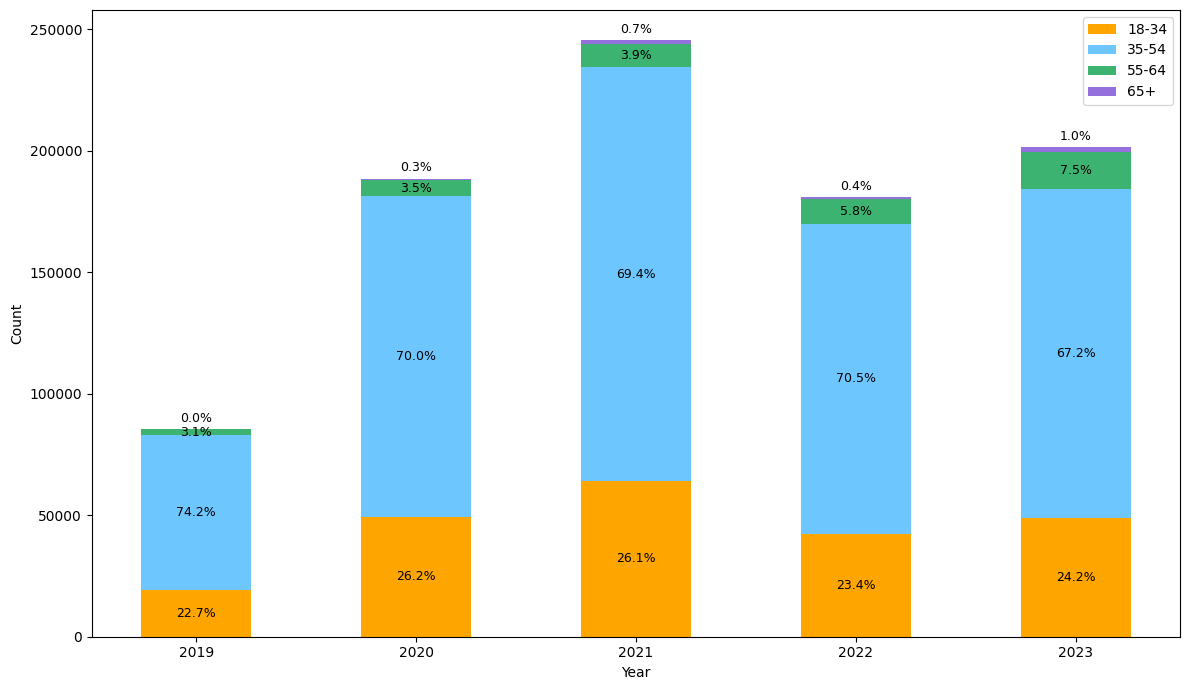

In [47]:
# Data from your table
years = all_grouped['year']
age_18_34 = all_grouped['18_34']
age_35_54 = all_grouped['35_54']
age_55_64 = all_grouped['55_64']
age_65plus = all_grouped['65plus']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Calculate total counts for percentage calculations
total_counts = np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64) + np.array(age_65plus)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting each age group in a stacked manner
bars_18_34 = ax.bar(x, age_18_34, width=0.5, color='orange', label='18-34')
bars_35_54 = ax.bar(x, age_35_54, width=0.5, bottom=age_18_34, color='#6EC6FF', label='35-54')
bars_55_64 = ax.bar(x, age_55_64, width=0.5, bottom=np.array(age_18_34) + np.array(age_35_54), color='#3CB371', label='55-64')
bars_65plus = ax.bar(x, age_65plus, width=0.5, bottom=np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64), color='#9370DB', label='65+')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Age Group Distribution by Year (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values, above=False):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        if above:
            # Place the label above the bar
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bottom + height),
                        xytext=(0, 3),  # Offset to place the label above
                        textcoords="offset points",
                        ha='center', va='bottom', color='black', fontsize=9)
        else:
            # Place the label inside the bar
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                        xytext=(0, 0), 
                        textcoords="offset points",
                        ha='center', va='center', color='black', fontsize=9)
# Add percentage labels for each age group
add_percentage_labels(bars_18_34, np.zeros(len(age_18_34)), total_counts)
add_percentage_labels(bars_35_54, age_18_34, total_counts)
add_percentage_labels(bars_55_64, np.array(age_18_34) + np.array(age_35_54), total_counts)
add_percentage_labels(bars_65plus, np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64), total_counts, above=True)

# Display the plot
plt.tight_layout()


plt.savefig('ages_kaikki.png',dpi=300)

plt.show()

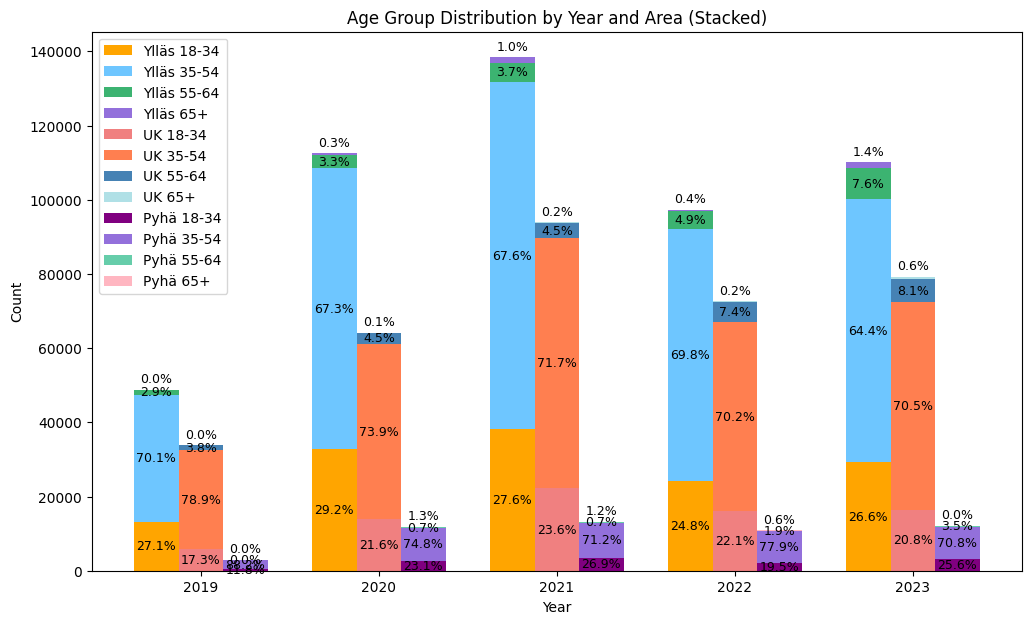

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data from your DataFrame (assuming similar structures for all areas)
# Replace the following with actual data from your DataFrame
years = UK_grouped['year']

# Assuming the same structure for each area
yllas_age_18_34 = yllas_grouped['18_34']
yllas_age_35_54 = yllas_grouped['35_54']
yllas_age_55_64 = yllas_grouped['55_64']
yllas_age_65plus = yllas_grouped['65plus']

uk_age_18_34 = UK_grouped['18_34']
uk_age_35_54 = UK_grouped['35_54']
uk_age_55_64 = UK_grouped['55_64']
uk_age_65plus = UK_grouped['65plus']

pyha_age_18_34 = pyha_grouped['18_34']
pyha_age_35_54 = pyha_grouped['35_54']
pyha_age_55_64 = pyha_grouped['55_64']
pyha_age_65plus = pyha_grouped['65plus']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations
bar_width = 0.25  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting each age group in a stacked manner for Ylläs
bars_yllas_18_34 = ax.bar(x - bar_width, yllas_age_18_34, width=bar_width, color='orange', label='Ylläs 18-34')
bars_yllas_35_54 = ax.bar(x - bar_width, yllas_age_35_54, width=bar_width, bottom=yllas_age_18_34, color='#6EC6FF', label='Ylläs 35-54')
bars_yllas_55_64 = ax.bar(x - bar_width, yllas_age_55_64, width=bar_width, bottom=np.array(yllas_age_18_34) + np.array(yllas_age_35_54), color='#3CB371', label='Ylläs 55-64')
bars_yllas_65plus = ax.bar(x - bar_width, yllas_age_65plus, width=bar_width, bottom=np.array(yllas_age_18_34) + np.array(yllas_age_35_54) + np.array(yllas_age_55_64), color='#9370DB', label='Ylläs 65+')

# Plotting each age group in a stacked manner for UK
bars_uk_18_34 = ax.bar(x, uk_age_18_34, width=bar_width, color='lightcoral', label='UK 18-34')
bars_uk_35_54 = ax.bar(x, uk_age_35_54, width=bar_width, bottom=uk_age_18_34, color='#FF7F50', label='UK 35-54')
bars_uk_55_64 = ax.bar(x, uk_age_55_64, width=bar_width, bottom=np.array(uk_age_18_34) + np.array(uk_age_35_54), color='#4682B4', label='UK 55-64')
bars_uk_65plus = ax.bar(x, uk_age_65plus, width=bar_width, bottom=np.array(uk_age_18_34) + np.array(uk_age_35_54) + np.array(uk_age_55_64), color='#B0E0E6', label='UK 65+')

# Plotting each age group in a stacked manner for Pyhä
bars_pyha_18_34 = ax.bar(x + bar_width, pyha_age_18_34, width=bar_width, color='purple', label='Pyhä 18-34')
bars_pyha_35_54 = ax.bar(x + bar_width, pyha_age_35_54, width=bar_width, bottom=pyha_age_18_34, color='#9370DB', label='Pyhä 35-54')
bars_pyha_55_64 = ax.bar(x + bar_width, pyha_age_55_64, width=bar_width, bottom=np.array(pyha_age_18_34) + np.array(pyha_age_35_54), color='#66CDAA', label='Pyhä 55-64')
bars_pyha_65plus = ax.bar(x + bar_width, pyha_age_65plus, width=bar_width, bottom=np.array(pyha_age_18_34) + np.array(pyha_age_35_54) + np.array(pyha_age_55_64), color='#FFB6C1', label='Pyhä 65+')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Age Group Distribution by Year and Area (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values, above=False):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        if above:
            # Place the label above the bar
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bottom + height),
                        xytext=(0, 3),  # Offset to place the label above
                        textcoords="offset points",
                        ha='center', va='bottom', color='black', fontsize=9)
        else:
            # Place the label inside the bar
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                        xytext=(0, 0), 
                        textcoords="offset points",
                        ha='center', va='center', color='black', fontsize=9)

# Total counts for percentage calculations
total_counts_yllas = np.array(yllas_age_18_34) + np.array(yllas_age_35_54) + np.array(yllas_age_55_64) + np.array(yllas_age_65plus)
total_counts_uk = np.array(uk_age_18_34) + np.array(uk_age_35_54) + np.array(uk_age_55_64) + np.array(uk_age_65plus)
total_counts_pyha = np.array(pyha_age_18_34) + np.array(pyha_age_35_54) + np.array(pyha_age_55_64) + np.array(pyha_age_65plus)

# Add percentage labels for each age group for Ylläs
add_percentage_labels(bars_yllas_18_34, np.zeros(len(yllas_age_18_34)), total_counts_yllas)
add_percentage_labels(bars_yllas_35_54, yllas_age_18_34, total_counts_yllas)
add_percentage_labels(bars_yllas_55_64, np.array(yllas_age_18_34) + np.array(yllas_age_35_54), total_counts_yllas)
add_percentage_labels(bars_yllas_65plus, np.array(yllas_age_18_34) + np.array(yllas_age_35_54) + np.array(yllas_age_55_64), total_counts_yllas, above=True)

# Add percentage labels for each age group for UK
add_percentage_labels(bars_uk_18_34, np.zeros(len(uk_age_18_34)), total_counts_uk)
add_percentage_labels(bars_uk_35_54, uk_age_18_34, total_counts_uk)
add_percentage_labels(bars_uk_55_64, np.array(uk_age_18_34) + np.array(uk_age_35_54), total_counts_uk)
add_percentage_labels(bars_uk_65plus, np.array(uk_age_18_34) + np.array(uk_age_35_54) + np.array(uk_age_55_64), total_counts_uk, above=True)

# Add percentage labels for each age group for Pyhä
add_percentage_labels(bars_pyha_18_34, np.zeros(len(pyha_age_18_34)), total_counts_pyha)
add_percentage_labels(bars_pyha_35_54, pyha_age_18_34, total_counts_pyha)
add_percentage_labels(bars_pyha_55_64, np.array(pyha_age_18_34) + np.array(pyha_age_35_54), total_counts_pyha)
add_percentage_labels(bars_pyha_65plus, np.array(pyha_age_18_34) + np.array(pyha_age_35_54) + np.array(pyha_age_55_64), total_counts_pyha, above=True)


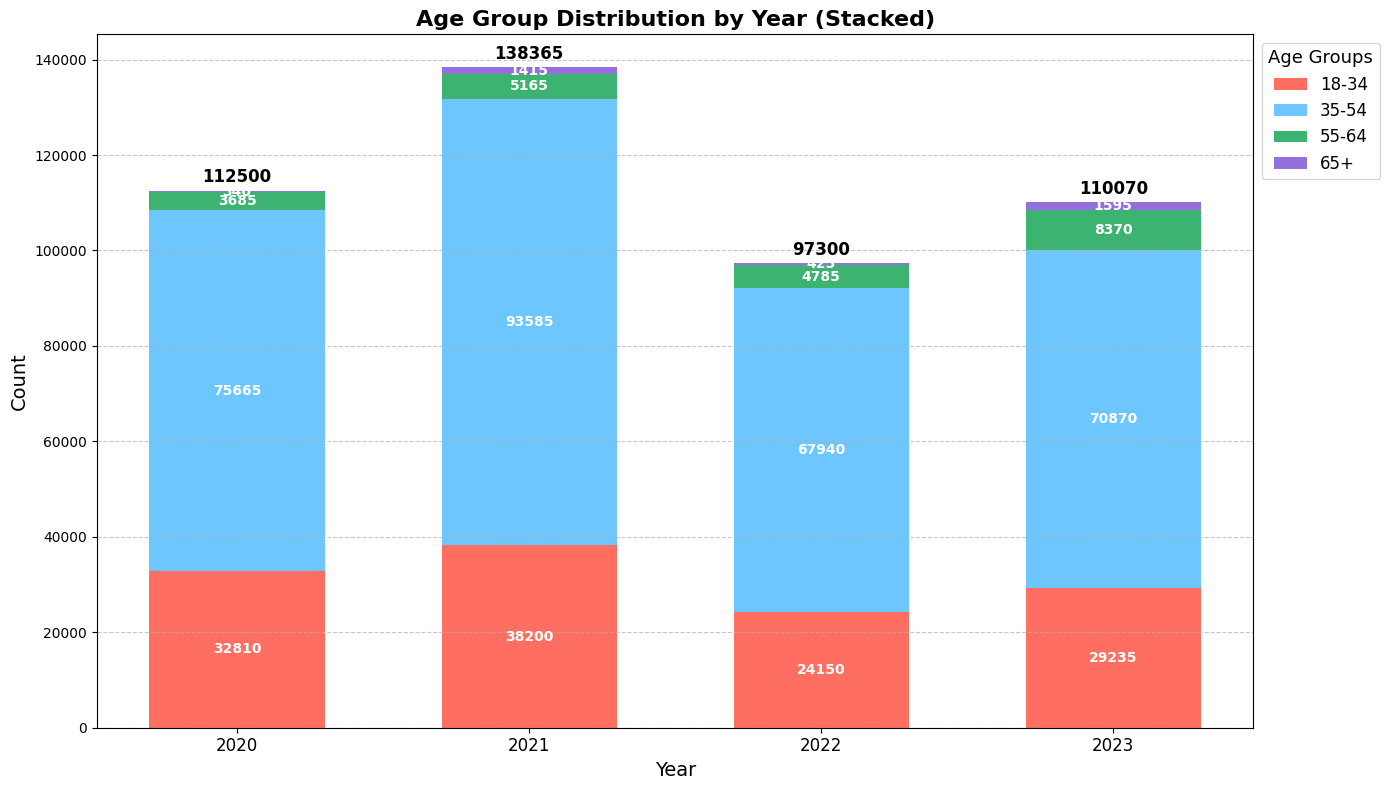

In [51]:
# Data from your table
years = ['2020', '2021', '2022', '2023']
age_18_34 = [32810, 38200, 24150, 29235]
age_35_54 = [75665, 93585, 67940, 70870]
age_55_64 = [3685, 5165, 4785, 8370]
age_65plus = [340, 1415, 425, 1595]

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Create the plot with improved aesthetics
fig, ax = plt.subplots(figsize=(14, 8))

# Define the colors
colors = ['#FF6F61', '#6EC6FF', '#3CB371', '#9370DB']

# Plotting each age group in a stacked manner
bar1 = ax.bar(x, age_18_34, width=0.6, color=colors[0], label='18-34')
bar2 = ax.bar(x, age_35_54, width=0.6, bottom=age_18_34, color=colors[1], label='35-54')
bar3 = ax.bar(x, age_55_64, width=0.6, bottom=np.array(age_18_34) + np.array(age_35_54), color=colors[2], label='55-64')
bar4 = ax.bar(x, age_65plus, width=0.6, bottom=np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64), color=colors[3], label='65+')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Age Group Distribution by Year (Stacked)', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(title='Age Groups', fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))

# Adding total counts at the top of each bar
total_counts = np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64) + np.array(age_65plus)
for i, total in enumerate(total_counts):
    ax.text(i, total + 1000, str(total), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add individual data labels for better interpretation
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add labels to each bar segment
add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [104]:
grouped_df.head()

,year,total_trip_count,ride,eride,18_34,35_54,55_64,65plus,male,female
0,2020,4532045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,6462050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,5253605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,5885535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
